In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from tensorflow import keras
from tensorflow.keras import layers
import time
import wandb
import julia
import os
from julia import DynamicalSystems
from julia import Base
from julia import Main
from julia import DifferentialEquations
from julia import NBodySimulator
from julia import StaticArrays
from julia import Plots
from matplotlib import rc
from mpl_toolkits import mplot3d

%load_ext julia.magic

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


In [148]:
%julia body1 = NBodySimulator.MassBody(StaticArrays.SVector(0., 0., 0.), StaticArrays.SVector(0., -0.001, 0.), 3000.0); body2 = NBodySimulator.MassBody(StaticArrays.SVector(0.2, 0., 0.), StaticArrays.SVector(0., 0.01, 0.), 300.0);

In [157]:
start_time = time.time()

%julia const G = 6.67e-8;
%julia system = NBodySimulator.GravitationalSystem([body1, body2], G)
%julia tspan = (0.0, 80000.0)
%julia simulation = NBodySimulator.NBodySimulation(system, tspan)
%julia sim_result = NBodySimulator.run_simulation(simulation, DifferentialEquations.Tsit5(), saveat= 3., abstol=1e-10, reltol=1e-10)
%julia sol = sim_result.solution.u
u = Main.sol

print("running time : %s seconds" % (time.time() - start_time))

running time : 3.468721628189087 seconds


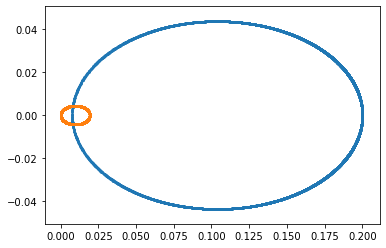

In [158]:
x1 = [i[0][0] for i in u]
x2 = [i[0][1] for i in u]

y1 = [i[1][0] for i in u]
y2 = [i[1][1] for i in u]

px1 = [i[0][2] for i in u]
px2 = [i[0][3] for i in u]

py1 = [i[1][2] for i in u]
py2 = [i[1][3] for i in u]

plt.scatter(x2, y2, s=1)
plt.scatter(x1, y1, s=1)

In [159]:
X_train = [[a,b,c,d,e,f,g,h] for a,b,c,d,e,f,g,h in zip(x1,y1,x2,y2,px1,py1,px2,py2)]
len(X_train)

24705

In [160]:
os.remove("X_train.txt")
f = open("X_train.txt", "a")
for i in X_train:
    for j in i:
        f.write(str(j))
        f.write("\n")
f.close()